<a href="https://colab.research.google.com/github/pandasorceress/DataScienceProjects/blob/main/Facial_Emotion_Detection_Full_Code_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Executive Summary and Solution Proposal

The most important findings from this project: The complex neural network model is the most accurate model and to achieve the performance desired is worth the computational expense. I propose using this model and refining it to achieve the desired accuracy.

If you want to refine the model:

**There are risks with a complex model like this, because often the additional convlutional layers can lead to overfitting. We could try 4 blocks, 3, blocks, 6 blocks, and we will see varying performance. 5 blocks seems is the best place to start here in the case of utilizing this CNN. This is a large dataset, so the 5 blocks are not of major concern for overfitting.
We can address dropout rate to ensure it is not inhibiting learning as well.
We can try ReLU or ELU for activation as well if Leaky ReLU is not always the best choice.   

Another thing to keep in mind is that there are supported 'best architectures' such as 36-76-1024 using adam optimizer and softmax classifier.

I have tested other architectures for the final model_complex, and this is delievering the best results. I think this model is where to start.**

# **Facial Emotion Detection**

## **The company has a large dataset containing images of human facial expressions. I need to build an AI model that accurately identifies which expressions represent the emotions in the dataset: Happy, Sad, Surprise, Neutral.**

**The context:** Why is this problem important to solve?<br>
It is important to solve this problem to enhance technology in analyzing human behavior and emotion through machine learning. If we can build devices that incorporate accurate identification of human emotion via body language, we can train these machines to aid in medical practice, education, counseling, and other areas to improve life.
**The objectives:** What is the intended goal?<br>
The goal is to create a computer vision model using Deep Learning and Artificial Intelligence to accurately detect the facial emotions in this dataset and classify them.
**The key questions:** What are the key questions that need to be answered?<br>
Are the images in the dataset clear?
Is there missing data? (maybe important)
What is the best way to filter the images?
What models work best?
What impact does that have on the company?
Can computers be taught to detect facial emotions in humans accurately?

**The problem formulation:** What are we trying to solve using data science?
We want to solve facial emotion detection using our model. We want accurate detection and multiclassification of these images to the most nearly correct emotion listed in the dataset.



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
from google.colab import drive #import Google Drive to access the dataset
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
#We are building a lot of models, so let's import everything we think we will need for Deep Learning and then add what we missed as we come to it.

import numpy as np #linear algebra
import pandas as pd #data processing
import seaborn as sns # data exploration, visualization
import matplotlib.pyplot as plt #visualization
import random #for setting seed when needed
import os
import zipfile #for unzipping the dataset
#let's add all the tensorflow and keras tools we may need. All of these help with shaping, scaling, normalization, and other parts of the creation of models from a dataset.
import tensorflow as tf #automation, model training
import keras #for use with tensorflow
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping #never used before but it seemed like it could be helpful to keep everything on track as I work.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal #tool I found for setting weights of Neural Networks with values based on normal distirbution with mean of 0. It may be helpful. If not, I will remove it.

from sklearn.model_selection import train_test_split #this wil be helpful when needing to split training and test data if necessary
from sklearn.metrics import confusion_matrix, classification_report #not sure I need this yet, but I did in my previous deep learning projects, so this will stay for now.

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
#It will be good to save the path of the file to a variable for more optimized code
drivepath = '/content/drive/MyDrive/CapStone MIT-PE/Facial_emotion_images.zip' #next, we can extract the data using zipfile
with zipfile.ZipFile(drivepath, 'r') as zip_ref:
    zip_ref.extractall()

#I saw some coders save the folder path, which I feel may be a good idea. Let's do that and set a size to a our images. Let's also set the types of images.
imagetypes = ['happy', 'sad', 'surprise', 'neutral']
imagesize = 48
folder = "Facial_emotion_images/"


## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

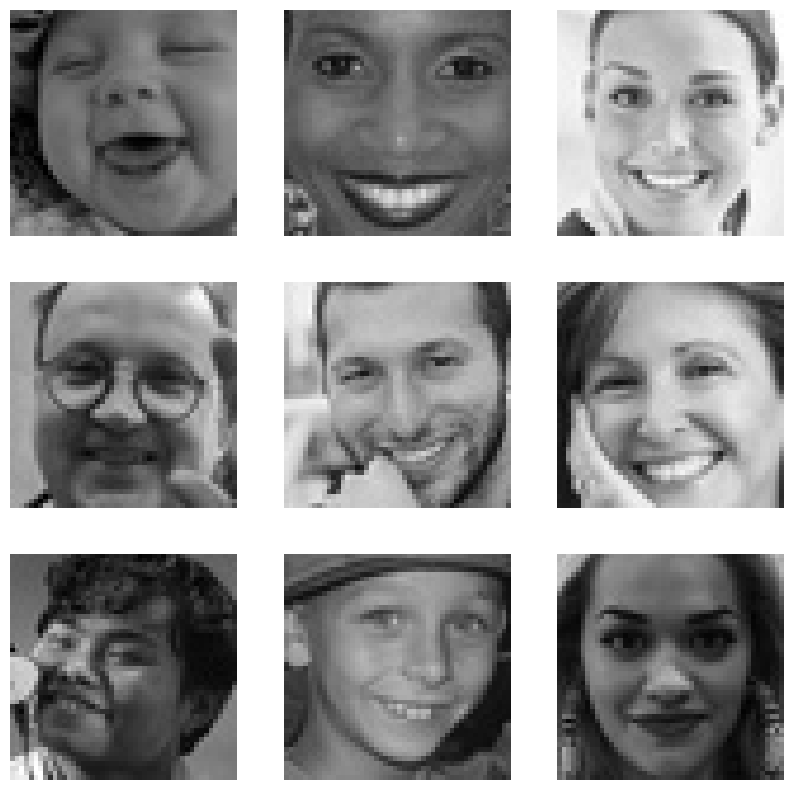

In [ ]:
emotion_expressed = 'happy'
#let's plot small figures. I prefer 10x10.
plt.figure(figsize=(10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3, i)
    #let's load the images now
    img = load_img(folder + "train/" + emotion_expressed + "/" +
                  os.listdir(folder + "train/" + emotion_expressed)[i], target_size = (imagesize, imagesize))
    plt.imshow(img)
    plt.axis('off')
plt.show()

**Observations and Insights: The set seems to contain only smiles and happy faces, so that is good, The images are fairly clear.**

### **Sad**

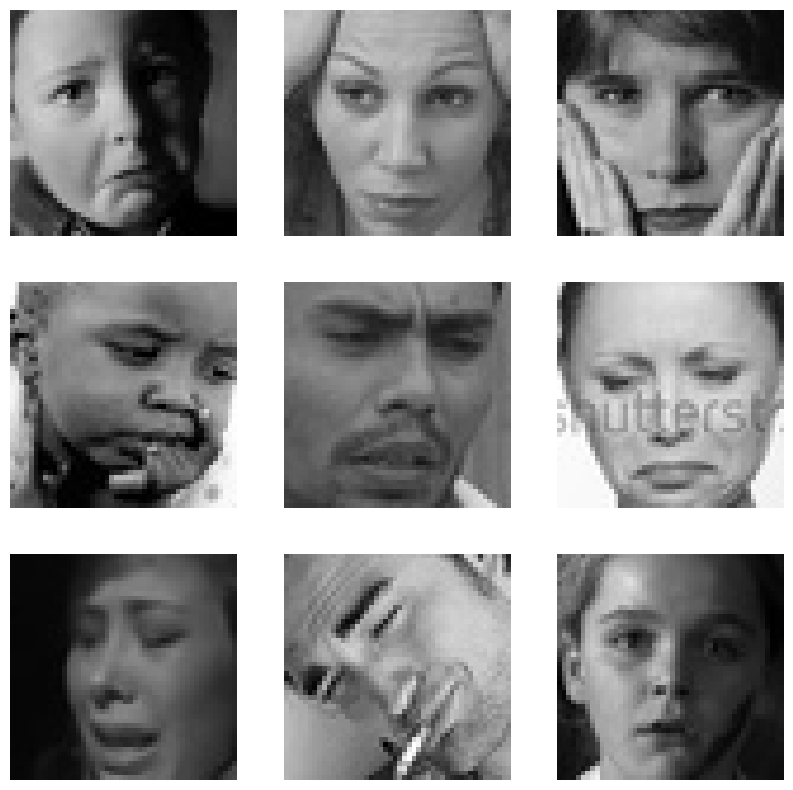

In [ ]:
emotion_expressed = 'sad'
#let's plot small figures. I prefer 10x10.
plt.figure(figsize=(10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3, i)
    #let's load the images now
    img = load_img(folder + "train/" + emotion_expressed + "/" +
                  os.listdir(folder + "train/" + emotion_expressed)[i], target_size = (imagesize, imagesize))
    plt.imshow(img)
    plt.axis('off')
plt.show()

**Observations and Insights:Some of these people seem sad, but some faces seem to be scared or dismayed as opposed to the general label of sad. It could be important to specify later. But these emotions are difficult to distinguish on faces (e.g. image 9)**

### **Neutral**

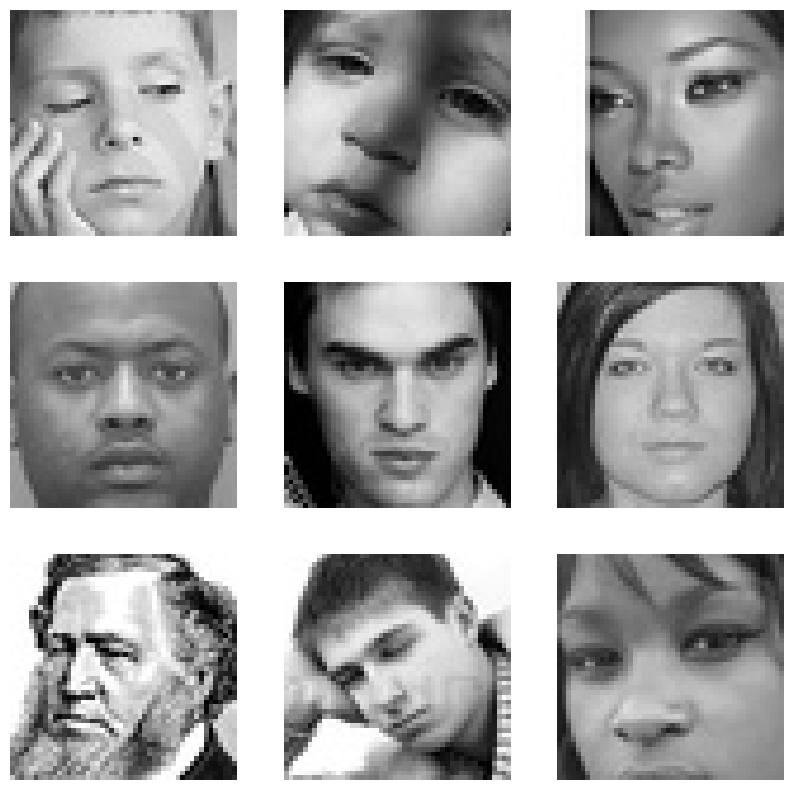

In [ ]:
emotion_expressed = 'neutral'
#let's plot small figures. I prefer 10x10.
plt.figure(figsize=(10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3, i)
    #let's load the images now
    img = load_img(folder + "train/" + emotion_expressed + "/" +
                  os.listdir(folder + "train/" + emotion_expressed)[i], target_size = (imagesize, imagesize))
    plt.imshow(img)
    plt.axis('off')
plt.show()

**Observations and Insights:Image 1 seems to be closer to anger than neutral. And image 9 is questionably a smile or perhaps 'happy'**

### **Surprised**

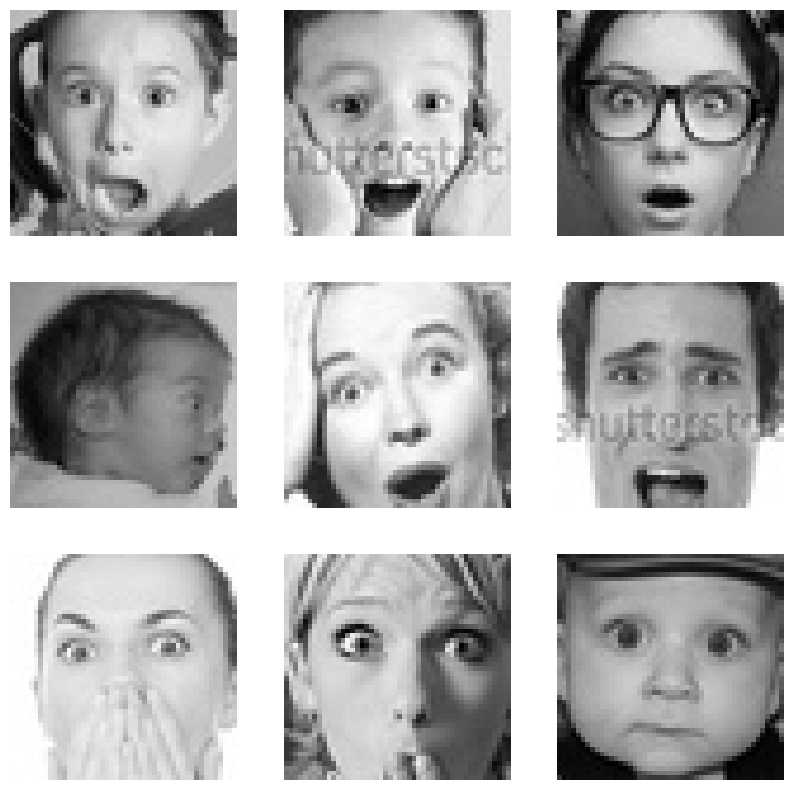

In [ ]:
emotion_expressed = 'surprise' #code lists class as surprise so remember to get that correct
#let's plot small figures. I prefer 10x10.
plt.figure(figsize=(10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3, i)
    #let's load the images now
    img = load_img(folder + "train/" + emotion_expressed + "/" +
                  os.listdir(folder + "train/" + emotion_expressed)[i], target_size = (imagesize, imagesize))
    plt.imshow(img)
    plt.axis('off')
plt.show()

**Observations and Insights: All images seem surprised. It could be helpful to train models to distinguish between shock and surprise. Images like 8 and 9 seem a bit different than simple surprise.**

## **Checking Distribution of Classes**

In [ ]:
#It will be helpful to start figuring out the shape of the data. So let's look at the length of the classes first.

total_happy = len(os.listdir(folder + "train/happy"))
total_sad = len(os.listdir(folder + "train/sad"))
total_surprise = len(os.listdir(folder + "train/surprise"))
total_neutral = len(os.listdir(folder + "train/neutral"))
#display class information
print(f"There are {total_happy} images of happy faces")
print(f"There are {total_sad} images of sad faces")
print(f"There are {total_surprise} images of surprised faces")
print(f"There are {total_neutral} images of neutral faces")
#now that we know the total number of images in the classes, let's plot them to check the distribution. We will need to make a pandas series too to do the work .

There are 3976 images of happy faces
There are 3982 images of sad faces
There are 3173 images of surprised faces
There are 3978 images of neutral faces


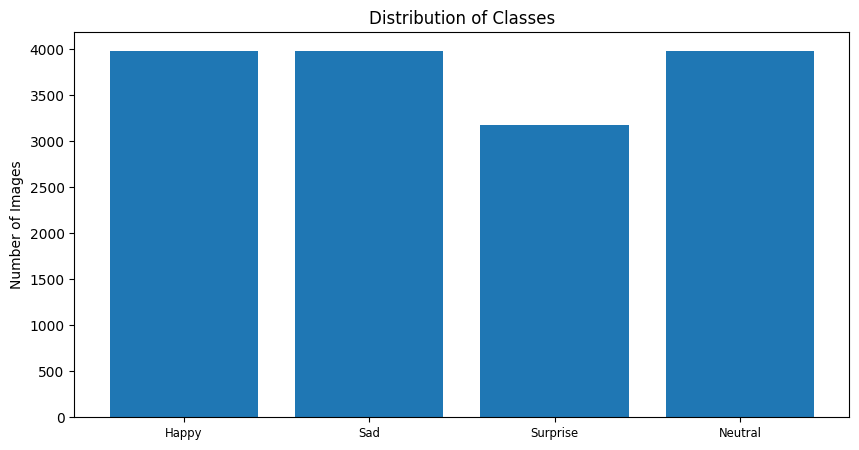

In [ ]:
plt.figure(figsize=(10,5)) #start building the plot
#let's create a DataFrame with our data now
data = {'Happy': total_happy, 'Sad': total_sad, 'Surprise': total_surprise, 'Neutral': total_neutral}
dataframe = pd.Series(data)
#plot it
plt.bar(range(len(dataframe)), dataframe.values, align = 'center')
plt.xticks(range(len(dataframe)), dataframe.index.values, size = 'small')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes')
plt.show()

**Observations and Insights:Happy, Sad, and Neutral appear equally distributed, but Surprise is lacking. Perhaps there may be missing values. Recall that our total for Surpise was 3173, which is significantly less than the others. And the other three classes also have different lengths but are closer together..within a range of 6. I wouold say the classes are not all equally distributed, and the imbalance is too high when it comes to the Surprise class. This could be a problem, but we can run EDA to check for missing values or duplicates or potential mismatches in the data to try and solve it.**

---



**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale', #Provide your chosen color_mode here ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale', #Provide your chosen color_mode here ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)
datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale', #Provide your chosen color_mode here ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


Observation: **Nothing changed in the results between grayscale and rbg, but we'll check again as we progress.

## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

Observations: **Using ANNs is not as good of an idea, because CNNs work better with image analysis. This is because ANNs rely heavily on valid data inputs while CNNs can work with images as data inputs.

So we should use CNNs because they analyze images better.**

### **Creating the Base Neural Network**

In [ ]:
#Base NN can start out more simply
#Sequential Model
from tensorflow.keras import models, layers #import tools I need
model_one = Sequential([
    layers.Conv2D(filters=64, kernel_size=(2), padding="same", activation ='relu', input_shape=(img_size, img_size, 1)), #64 filters kernel size 2, 'same' padding and the input shape (48, 48, 3) for rgb and (48, 48, 1) for grayscale, and our activation is 'relu' like in the past
    layers.MaxPooling2D(pool_size=(2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters=32, kernel_size=(2), padding="same", activation='relu'),
    layers.MaxPooling2D(pool_size=(2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters=32, kernel_size=(2), padding="same", activation='relu'),
    layers.MaxPooling2D(pool_size=(2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(4, activation='softmax')
])
model_one.summary()
#return model_one
#64 filters kernel size 2, 'same' padding and the input shape (48, 48, 3) for rgb and (48, 48, 1) for grayscale, and our activation is 'relu' like in the past
#MaxPooling will be pool size = 2, Dropout Layer 0.2,
#Then we do a 32 filter, kernel size 2 layer with relu and same for activation and padding
#Then, we follow that up again with MaxPooling pool size 2, and Dropout Layer 0.2
#We will then Flatten the model for use
#Add Dense layer with relu activation (512 neurons)
#Dropout Layer with ration 0.4
#Dense layer of 4 with softmaxd activation
#summary of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

Zero non-trainable parameters in this.

### **Compiling and Training the Model**

In [ ]:
#save work using keras.callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
savepoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max') #saving weights for future use
early_stopping = EarlyStopping(monitor = 'val_loss', #hopefully prevent overfitting with early_stopping
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss', #reduce learning rate when it becomes stagnate
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)
callbacks_list = [early_stopping, savepoint, reduce_learningrate] #saving to variable
epochs = 20 #set epochs for training

In [ ]:
#compile and train the model using adam optimizer and categorical_crossentropy
model_one.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
history = model_one.fit(train_set, epochs = epochs, validation_data = validation_set, callbacks = callbacks_list)


Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3611 - accuracy: 0.3033

473/473 [==============================] - 23s 38ms/step - loss: 1.3611 - accuracy: 0.3033 - val_loss: 1.2459 - val_accuracy: 0.4621 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.2437 - accuracy: 0.4342

473/473 [==============================] - 17s 36ms/step - loss: 1.2436 - accuracy: 0.4342 - val_loss: 1.1430 - val_accuracy: 0.4951 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1606 - accuracy: 0.4855

473/473 [==============================] - 17s 36ms/step - loss: 1.1606 - accuracy: 0.4855 - val_loss: 1.1198 - val_accuracy: 0.5278 - lr: 0.0010
Epoch 4/20
472/473 [============================>.] - ETA: 0s - loss: 1.1088 - accuracy: 0.5069

473/473 [==============================] - 17s 35ms/step - loss: 1.1087 - accuracy: 0.5070 - val_loss: 1.0295 - val_accuracy: 0.5640 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 1.0715 - accuracy: 0.5345

473/473 [==============================] - 17s 36ms/step - loss: 1.0715 - accuracy: 0.5345 - val_loss: 1.0036 - val_accuracy: 0.5823 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 1.0365 - accuracy: 0.5486

473/473 [==============================] - 17s 36ms/step - loss: 1.0365 - accuracy: 0.5486 - val_loss: 1.0003 - val_accuracy: 0.5736 - lr: 0.0010
Epoch 7/20
472/473 [============================>.] - ETA: 0s - loss: 1.0123 - accuracy: 0.5580

473/473 [==============================] - 17s 36ms/step - loss: 1.0119 - accuracy: 0.5583 - val_loss: 0.9421 - val_accuracy: 0.6004 - lr: 0.0010
Epoch 8/20
472/473 [============================>.] - ETA: 0s - loss: 1.0029 - accuracy: 0.5676

473/473 [==============================] - 17s 36ms/step - loss: 1.0028 - accuracy: 0.5677 - val_loss: 0.9732 - val_accuracy: 0.5897 - lr: 0.0010
Epoch 9/20
472/473 [============================>.] - ETA: 0s - loss: 0.9761 - accuracy: 0.5792

473/473 [==============================] - 17s 36ms/step - loss: 0.9760 - accuracy: 0.5791 - val_loss: 0.8899 - val_accuracy: 0.6235 - lr: 0.0010
Epoch 10/20
472/473 [============================>.] - ETA: 0s - loss: 0.9685 - accuracy: 0.5819

473/473 [==============================] - 17s 35ms/step - loss: 0.9684 - accuracy: 0.5820 - val_loss: 0.9283 - val_accuracy: 0.6130 - lr: 0.0010
Epoch 11/20
473/473 [==============================] - ETA: 0s - loss: 0.9497 - accuracy: 0.5945

473/473 [==============================] - 17s 36ms/step - loss: 0.9497 - accuracy: 0.5945 - val_loss: 0.9021 - val_accuracy: 0.6363 - lr: 0.0010
Epoch 12/20
472/473 [============================>.] - ETA: 0s - loss: 0.9436 - accuracy: 0.5936

473/473 [==============================] - 17s 35ms/step - loss: 0.9433 - accuracy: 0.5936 - val_loss: 0.8831 - val_accuracy: 0.6295 - lr: 0.0010
Epoch 13/20
472/473 [============================>.] - ETA: 0s - loss: 0.9186 - accuracy: 0.6071

473/473 [==============================] - 17s 35ms/step - loss: 0.9184 - accuracy: 0.6072 - val_loss: 0.8736 - val_accuracy: 0.6424 - lr: 0.0010
Epoch 14/20
472/473 [============================>.] - ETA: 0s - loss: 0.9114 - accuracy: 0.6127

473/473 [==============================] - 17s 36ms/step - loss: 0.9118 - accuracy: 0.6126 - val_loss: 0.8783 - val_accuracy: 0.6279 - lr: 0.0010
Epoch 15/20
472/473 [============================>.] - ETA: 0s - loss: 0.9051 - accuracy: 0.6156

473/473 [==============================] - 16s 35ms/step - loss: 0.9053 - accuracy: 0.6155 - val_loss: 0.8719 - val_accuracy: 0.6393 - lr: 0.0010
Epoch 16/20
472/473 [============================>.] - ETA: 0s - loss: 0.8928 - accuracy: 0.6209

473/473 [==============================] - 17s 35ms/step - loss: 0.8929 - accuracy: 0.6209 - val_loss: 0.8362 - val_accuracy: 0.6582 - lr: 0.0010
Epoch 17/20
473/473 [==============================] - ETA: 0s - loss: 0.8762 - accuracy: 0.6302

473/473 [==============================] - 17s 35ms/step - loss: 0.8762 - accuracy: 0.6302 - val_loss: 0.8340 - val_accuracy: 0.6540 - lr: 0.0010
Epoch 18/20
472/473 [============================>.] - ETA: 0s - loss: 0.8684 - accuracy: 0.6343

473/473 [==============================] - 17s 35ms/step - loss: 0.8683 - accuracy: 0.6345 - val_loss: 0.8107 - val_accuracy: 0.6647 - lr: 0.0010
Epoch 19/20
473/473 [==============================] - ETA: 0s - loss: 0.8654 - accuracy: 0.6335

473/473 [==============================] - 17s 35ms/step - loss: 0.8654 - accuracy: 0.6335 - val_loss: 0.8459 - val_accuracy: 0.6542 - lr: 0.0010
Epoch 20/20
473/473 [==============================] - ETA: 0s - loss: 0.8492 - accuracy: 0.6407

473/473 [==============================] - 17s 35ms/step - loss: 0.8492 - accuracy: 0.6407 - val_loss: 0.8325 - val_accuracy: 0.6520 - lr: 0.0010


Observations: I used categorical_crossentropy as opposed to KL convergence because it is better for multi-class. The model's loss rate decreases as it goes and accuracy is minimally improving along the epochs. And it made it through all 20 epochs.

### **Evaluating the Model on the Test Set**

In [ ]:
#evaluate the model above on the Test Set

model_one.evaluate(test_set)


156/156 [==============================] - 4s 26ms/step - loss: 0.8275 - accuracy: 0.6628


[0.8274722099304199, 0.6628491282463074]

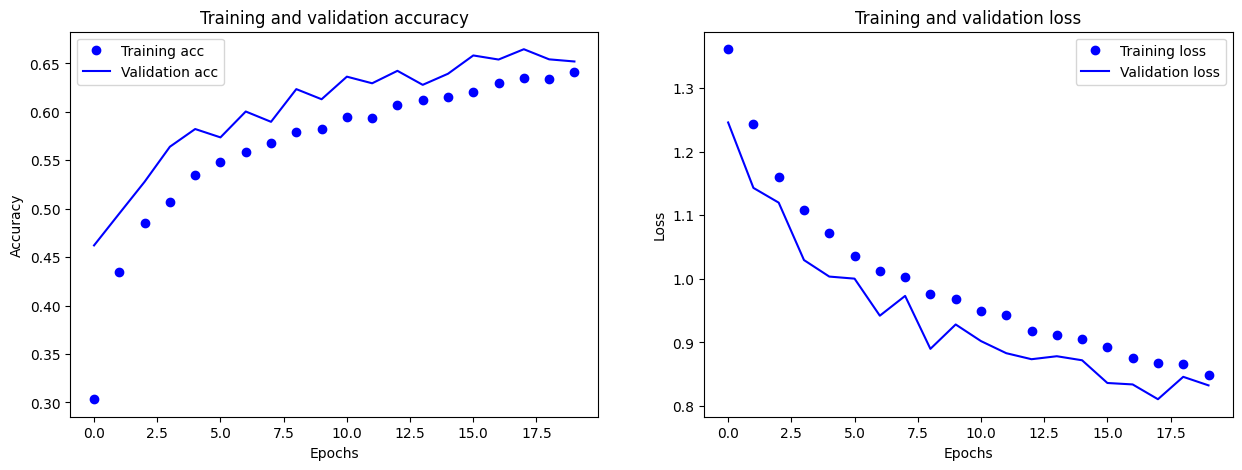

In [ ]:
#Next I want to plot the training history of this model

import matplotlib.pyplot as plt

# Get the training and validation accuracy values from the history dictionary.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training and validation loss values from the history dictionary.
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs.
epochs = range(len(acc))

# Create a figure with two subplots.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the training and validation accuracy on the first subplot.
ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the training and validation loss on the second subplot.
ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plot.
plt.show()


**Observations and Insights:

The result above shows that the model achieved an accuracy of ~66% on the test set. This means that the model correctly classified ~66% of the images in the test set.

The model is performing well generally, but it needs to improve.**

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
# create convolutional neural network like the one above but make it a slightly larger architecture. Let's make our filters really large. One example uses 256, so let's use 256, then work backwards all the way down to 32 filters for the final convolutional block.
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
#Sequential Model
model_two = Sequential([
    layers.Conv2D(filters=256, kernel_size=(2), padding="same", activation ='relu', input_shape=(img_size, img_size, 1)), #64 filters kernel size 2, 'same' padding and the input shape (48, 48, 3) for rgb and (48, 48, 1) for grayscale, and our activation is 'relu' like in the past
    layers.BatchNormalization(),#speeds up training
    layers.LeakyReLU(alpha=0.1), #input small negative slope to keep help flow of information
    layers.MaxPooling2D(pool_size=(2)),
    layers.Conv2D(filters=32, kernel_size=(2), padding="same", activation='relu'),
    layers.MaxPooling2D(pool_size=(2)),
    layers.Conv2D(filters=128, kernel_size=(2), padding="same", activation='relu'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(pool_size=(2)),
    layers.Conv2D(filters=64, kernel_size=(2), padding="same", activation='relu'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(pool_size=(2)),
    layers.Conv2D(filters=32, kernel_size=(2), padding="same", activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model_two.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 256)       1024      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        32800     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)       

Note we see 896 non-trainable parameters. These should be our weights though that we are not updating.

### **Compiling and Training the Model**

In [ ]:
#save work using keras.callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
savepoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max') #saving weights for future use
early_stopping = EarlyStopping(monitor = 'val_loss', #hopefully prevent overfitting with early_stopping
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss', #reduce learning rate when it becomes stagnate
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)
callbacks_list = [early_stopping, savepoint, reduce_learningrate] #saving to variable
epochs = 20 #set epochs for training  #repeating code from above


In [ ]:
#compile then fit the model
model_two.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
history_2 = model_two.fit(train_set, epochs = epochs, validation_data = validation_set, callbacks = callbacks_list)


Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.2987 - accuracy: 0.3676

473/473 [==============================] - 21s 37ms/step - loss: 1.2987 - accuracy: 0.3676 - val_loss: 1.2861 - val_accuracy: 0.3625 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.1238 - accuracy: 0.4900

473/473 [==============================] - 18s 37ms/step - loss: 1.1238 - accuracy: 0.4900 - val_loss: 1.0566 - val_accuracy: 0.5421 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 0.9835 - accuracy: 0.5735

473/473 [==============================] - 18s 38ms/step - loss: 0.9834 - accuracy: 0.5736 - val_loss: 0.9912 - val_accuracy: 0.5638 - lr: 0.0010
Epoch 4/20
472/473 [============================>.] - ETA: 0s - loss: 0.9134 - accuracy: 0.6109

473/473 [==============================] - 17s 36ms/step - loss: 0.9134 - accuracy: 0.6111 - val_loss: 0.9318 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 5/20
472/473 [============================>.] - ETA: 0s - loss: 0.8652 - accuracy: 0.6309

473/473 [==============================] - 17s 36ms/step - loss: 0.8648 - accuracy: 0.6311 - val_loss: 0.8914 - val_accuracy: 0.6341 - lr: 0.0010
Epoch 6/20
472/473 [============================>.] - ETA: 0s - loss: 0.8365 - accuracy: 0.6468

473/473 [==============================] - 17s 36ms/step - loss: 0.8362 - accuracy: 0.6471 - val_loss: 0.8462 - val_accuracy: 0.6546 - lr: 0.0010
Epoch 7/20
472/473 [============================>.] - ETA: 0s - loss: 0.8100 - accuracy: 0.6556

473/473 [==============================] - 17s 35ms/step - loss: 0.8103 - accuracy: 0.6554 - val_loss: 0.8969 - val_accuracy: 0.6311 - lr: 0.0010
Epoch 8/20
473/473 [==============================] - ETA: 0s - loss: 0.7870 - accuracy: 0.6716

473/473 [==============================] - 17s 36ms/step - loss: 0.7870 - accuracy: 0.6716 - val_loss: 0.8295 - val_accuracy: 0.6578 - lr: 0.0010
Epoch 9/20
472/473 [============================>.] - ETA: 0s - loss: 0.7558 - accuracy: 0.6838

473/473 [==============================] - 17s 36ms/step - loss: 0.7557 - accuracy: 0.6837 - val_loss: 0.9383 - val_accuracy: 0.6289 - lr: 0.0010
Epoch 10/20
472/473 [============================>.] - ETA: 0s - loss: 0.7457 - accuracy: 0.6852

473/473 [==============================] - 17s 36ms/step - loss: 0.7457 - accuracy: 0.6853 - val_loss: 0.8225 - val_accuracy: 0.6496 - lr: 0.0010
Epoch 11/20
472/473 [============================>.] - ETA: 0s - loss: 0.7286 - accuracy: 0.6903

473/473 [==============================] - 17s 36ms/step - loss: 0.7282 - accuracy: 0.6903 - val_loss: 0.8108 - val_accuracy: 0.6647 - lr: 0.0010
Epoch 12/20
473/473 [==============================] - ETA: 0s - loss: 0.7097 - accuracy: 0.7027

473/473 [==============================] - 17s 36ms/step - loss: 0.7097 - accuracy: 0.7027 - val_loss: 0.8585 - val_accuracy: 0.6498 - lr: 0.0010
Epoch 13/20
473/473 [==============================] - ETA: 0s - loss: 0.7052 - accuracy: 0.7074

473/473 [==============================] - 17s 36ms/step - loss: 0.7052 - accuracy: 0.7074 - val_loss: 0.8507 - val_accuracy: 0.6506 - lr: 0.0010
Epoch 14/20
472/473 [============================>.] - ETA: 0s - loss: 0.6798 - accuracy: 0.7154Restoring model weights from the end of the best epoch: 11.



Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 17s 36ms/step - loss: 0.6796 - accuracy: 0.7155 - val_loss: 0.9799 - val_accuracy: 0.6213 - lr: 0.0010
Epoch 14: early stopping


Model's accuracy improves each epoch and the loss rate decreases. The model seems to be generally performing well. The training stopped at Epoch 14 with our early stopping. Best epoch is 11.

### **Evaluating the Model on the Test Set**

In [ ]:
#test set evaluation like above
model_two.evaluate(test_set)

156/156 [==============================] - 4s 26ms/step - loss: 0.8118 - accuracy: 0.6616


[0.8118137717247009, 0.6616435647010803]

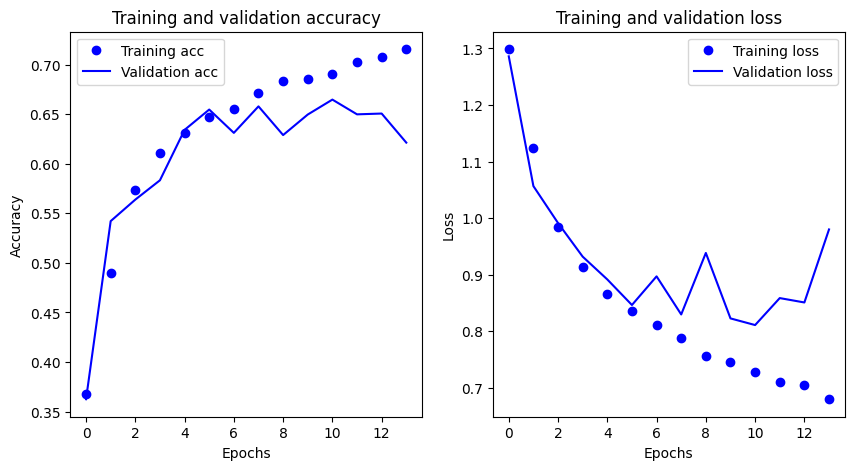

In [ ]:
#Next I want to plot the training history of this model

import matplotlib.pyplot as plt

# Get the training and validation accuracy values from the history dictionary.
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

# Get the training and validation loss values from the history dictionary.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

# Get the number of epochs.
epochs = range(len(acc))

# Create a figure with two subplots.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation accuracy on the first subplot.
ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the training and validation loss on the second subplot.
ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plot.
plt.show()


**Observations and Insights:  The model achieved an accuracy of ~66% (66.16%) on the test set, which means that it correctly classified ~66%of the images in the test set. The performance is on par with the first model, which achieved an accuracy of ~66% (66.28%) on the test set. Accuracy improves and loss decreases. Model improved for sure, but it could be better.**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
#recall our work earlier
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range = (0., 2.),
                                  rescale = 1./255,
                                  shear_range = 0.3)

validation_set =  datagen_validation.flow_from_directory(folder + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range = (0., 2.),
                                  rescale = 1./255,
                                  shear_range = 0.3)
test_set = datagen_test.flow_from_directory(folder + "test",
                                            target_size = (img_size, img_size),
                                            color_mode = 'rgb',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

VGG16 uses 13 layers on CNNs with MaxPooling and 3 fully connected layers. It is great for image classification and thought of as a simple and effective model.

### **Importing the VGG16 Architecture**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16 #importing what I need
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3)) #note the rgb shape designation
vgg.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
#I will go up to layer block5_pool just for the sake of the design. It makes sense to me looking at the summary.

transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

# Add classification layers on top of it

x = Flatten()(transfer_layer.output) #flatten output
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(4, activation = 'softmax')(x)

# Initializing the model
model_vgg = Model(vgg.input, x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

model_vgg = Model(vgg.input, pred) # Initializing the model

### **Compiling and Training the VGG16 Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau #creating another checkpoint

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

In [ ]:
#compile
model_vgg.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
#train and fit
epochs = 10
history_vgg = model_vgg.fit(train_set, epochs = epochs, validation_data = validation_set, callbacks = callbacks_list)


Epoch 1/10
473/473 [==============================] - ETA: 0s - loss: 1.3063 - accuracy: 0.3611
Epoch 1: val_loss improved from -inf to 1.29128, saving model to ./vggmodel.h5
473/473 [==============================] - 31s 58ms/step - loss: 1.3063 - accuracy: 0.3611 - val_loss: 1.2913 - val_accuracy: 0.3966 - lr: 0.0010
Epoch 2/10
  1/473 [..............................] - ETA: 29s - loss: 1.0805 - accuracy: 0.5312

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/473 [==============================] - ETA: 0s - loss: 1.2432 - accuracy: 0.4112
Epoch 2: val_loss did not improve from 1.29128
473/473 [==============================] - 26s 55ms/step - loss: 1.2432 - accuracy: 0.4112 - val_loss: 1.2396 - val_accuracy: 0.4215 - lr: 0.0010
Epoch 3/10
472/473 [============================>.] - ETA: 0s - loss: 1.2291 - accuracy: 0.4234
Epoch 3: val_loss did not improve from 1.29128
473/473 [==============================] - 25s 54ms/step - loss: 1.2289 - accuracy: 0.4237 - val_loss: 1.2886 - val_accuracy: 0.4171 - lr: 0.0010
Epoch 4/10
473/473 [==============================] - ETA: 0s - loss: 1.2229 - accuracy: 0.4314
Epoch 4: val_loss did not improve from 1.29128
473/473 [==============================] - 27s 56ms/step - loss: 1.2229 - accuracy: 0.4314 - val_loss: 1.2356 - val_accuracy: 0.4199 - lr: 0.0010
Epoch 5/10
472/473 [============================>.] - ETA: 0s - loss: 1.2089 - accuracy: 0.4403
Epoch 5: val_loss did not improve from 1.29128
4

Observations: Epoch 6 caused stopping due to the reduced learning rate feature. No val_loss improvement, so epoch 7 stopped. Best epoch was 4. The accuracy did increase with the epochs and loss was up and down. Epoch 2 had highest accuracy though which shows some volatility.

### **Evaluating the VGG16 model**

In [ ]:
#test
model_vgg.evaluate(test_set)

4/4 [==============================] - 0s 46ms/step - loss: 1.2551 - accuracy: 0.3750


[1.2551020383834839, 0.375]

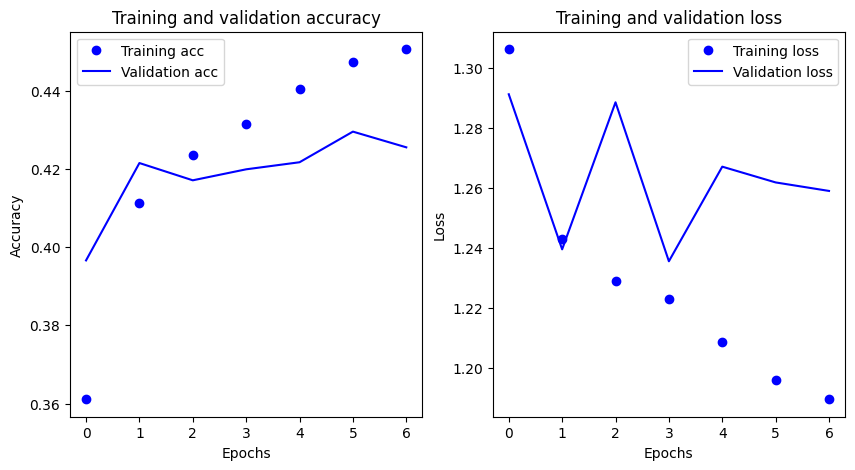

In [ ]:
#Next I want to plot the training history of this model

import matplotlib.pyplot as plt

# Get the training and validation accuracy values from the history dictionary.
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']

# Get the training and validation loss values from the history dictionary.
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

# Get the number of epochs.
epochs = range(len(acc))

# Create a figure with two subplots.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation accuracy on the first subplot.
ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the training and validation loss on the second subplot.
ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plot.
plt.show()


**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights: the model achieved an accuracy of ~37% (37.50) on the test set, which means that it correctly classified ~37% of the images in the test set. This is bad performance.

The loss value of approximately 1.25 indicates that the model is still makingmistakes, and it is under performing. It is not as good as the previousl model so I rule this out now.
 **

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

We'll use batch normalization before every layer here. ResNet V2 is designed for image classification using a family of networks.

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
#import what I need to do the work
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

171446536/171446536 [==============================] - 5s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                   

In [ ]:
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add') #I'm going to conv5_block3_add based on the summary.
Resnet.trainable=False

# Add classification
x = Flatten()(transfer_layer_Resnet.output) #flatten output
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x) #dropout layer
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation = 'softmax')(x) #use softmax

resnetmodel = Model(Resnet.input, pred) # Initializing the model

### **Compiling and Training the Model**

In [ ]:
#save it all again
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Resnetmodel.h5", monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_accuracy',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_accuracy',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)


callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 10

In [ ]:
#compile
resnetmodel.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
#train and fit
history_resnet = resnetmodel.fit(train_set, epochs = epochs, validation_data = validation_set, callbacks = callbacks_list)

TypeError: unsupported operand type(s) for -: 'range' and 'int'

The accuracy is a bit volatile as the epochs increase, but the val_loss is was well. The model ran through all 10 epochs without early stopping. Higher accuracy performance on Epoch 10 and Epoch 7.

### **Evaluating the ResNet Model**

In [ ]:
#test
resnetmodel.evaluate(test_set)

4/4 [==============================] - 0s 43ms/step - loss: 1.3894 - accuracy: 0.2500


[1.3893966674804688, 0.25]

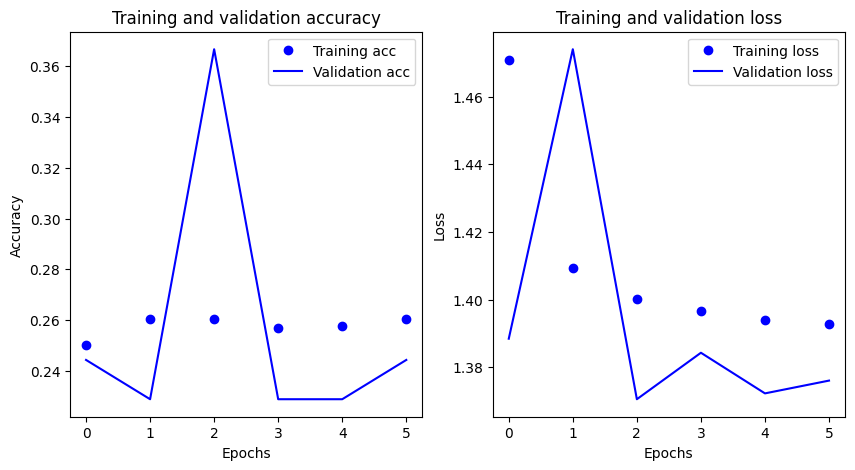

In [ ]:
##Next I want to plot the training history of this model

import matplotlib.pyplot as plt

# Get the training and validation accuracy values from the history dictionary.
acc = history_resnet.history['accuracy']
val_acc = history_resnet.history['val_accuracy']

# Get the training and validation loss values from the history dictionary.
loss = history_resnet.history['loss']
val_loss = history_resnet.history['val_loss']

# Get the number of epochs.
epochs = range(len(acc))

# Create a figure with two subplots.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation accuracy on the first subplot.
ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the training and validation loss on the second subplot.
ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plot.
plt.show()



**This model under performed as well. If we want to use this model, it will need a lot of tweaks. Currently it offers ~25% accuracy which is not okay.

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [ ]:
#import it all
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

35839040/35839040 [==============================] - 1s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_3[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation') #I am using block6e_expand_activation
EfficientNet.trainable = False

# adding structure
x = EfficientNet.output
x = Flatten()(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation = 'softmax')(x)

# Initializing the model
Efficientnetmodel = Model(EfficientNet.input, pred)

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Efficientnetmodel.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_accuarcy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 10

In [ ]:
#compile
Efficientnetmodel.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
#train and fit
history_Efficientnet = Efficientnetmodel.fit(train_set, epochs = epochs, validation_data = validation_set, callbacks = callbacks_list)

Epoch 1/10
472/473 [============================>.] - ETA: 0s - loss: 1.4633 - accuracy: 0.2473


Epoch 1: val_accuracy improved from -inf to 0.36669, saving model to ./Efficientnetmodel.h5
473/473 [==============================] - 41s 64ms/step - loss: 1.4632 - accuracy: 0.2472 - val_loss: 1.3480 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 2/10
473/473 [==============================] - ETA: 0s - loss: 1.4040 - accuracy: 0.2643


Epoch 2: val_accuracy did not improve from 0.36669
473/473 [==============================] - 27s 56ms/step - loss: 1.4040 - accuracy: 0.2643 - val_loss: 1.3591 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 3/10
473/473 [==============================] - ETA: 0s - loss: 1.3983 - accuracy: 0.2593


Epoch 3: val_accuracy did not improve from 0.36669
473/473 [==============================] - 27s 56ms/step - loss: 1.3983 - accuracy: 0.2593 - val_loss: 1.3726 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 4/10
472/473 [============================>.] - ETA: 0s - loss: 1.3947 - accuracy: 0.2698


Epoch 4: val_accuracy did not improve from 0.36669

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 27s 57ms/step - loss: 1.3947 - accuracy: 0.2698 - val_loss: 1.3592 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 5/10
473/473 [==============================] - ETA: 0s - loss: 1.3871 - accuracy: 0.2698


Epoch 5: val_accuracy did not improve from 0.36669
473/473 [==============================] - 27s 57ms/step - loss: 1.3871 - accuracy: 0.2698 - val_loss: 1.3549 - val_accuracy: 0.3667 - lr: 2.0000e-04
Epoch 6/10
473/473 [==============================] - ETA: 0s - loss: 1.3882 - accuracy: 0.2580


Epoch 6: val_accuracy did not improve from 0.36669
473/473 [==============================] - 26s 55ms/step - loss: 1.3882 - accuracy: 0.2580 - val_loss: 1.3598 - val_accuracy: 0.3667 - lr: 2.0000e-04
Epoch 7/10
472/473 [============================>.] - ETA: 0s - loss: 1.3867 - accuracy: 0.2610


Epoch 7: val_accuracy did not improve from 0.36669

Epoch 7: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
473/473 [==============================] - 26s 56ms/step - loss: 1.3867 - accuracy: 0.2615 - val_loss: 1.3582 - val_accuracy: 0.3667 - lr: 2.0000e-04
Epoch 8/10
472/473 [============================>.] - ETA: 0s - loss: 1.3865 - accuracy: 0.2619


Epoch 8: val_accuracy did not improve from 0.36669
473/473 [==============================] - 26s 56ms/step - loss: 1.3866 - accuracy: 0.2619 - val_loss: 1.3615 - val_accuracy: 0.3667 - lr: 4.0000e-05
Epoch 9/10
472/473 [============================>.] - ETA: 0s - loss: 1.3854 - accuracy: 0.2660


Epoch 9: val_accuracy did not improve from 0.36669
473/473 [==============================] - 27s 58ms/step - loss: 1.3855 - accuracy: 0.2657 - val_loss: 1.3610 - val_accuracy: 0.3667 - lr: 4.0000e-05
Epoch 10/10
472/473 [============================>.] - ETA: 0s - loss: 1.3847 - accuracy: 0.2617


Epoch 10: val_accuracy did not improve from 0.36669

Epoch 10: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
473/473 [==============================] - 27s 58ms/step - loss: 1.3847 - accuracy: 0.2618 - val_loss: 1.3617 - val_accuracy: 0.3667 - lr: 4.0000e-05


### **Evaluating the EfficientnetNet Model**

In [ ]:
#test
Efficientnetmodel.evaluate(test_set)

4/4 [==============================] - 0s 43ms/step - loss: 1.3934 - accuracy: 0.2500


[1.3933684825897217, 0.25]

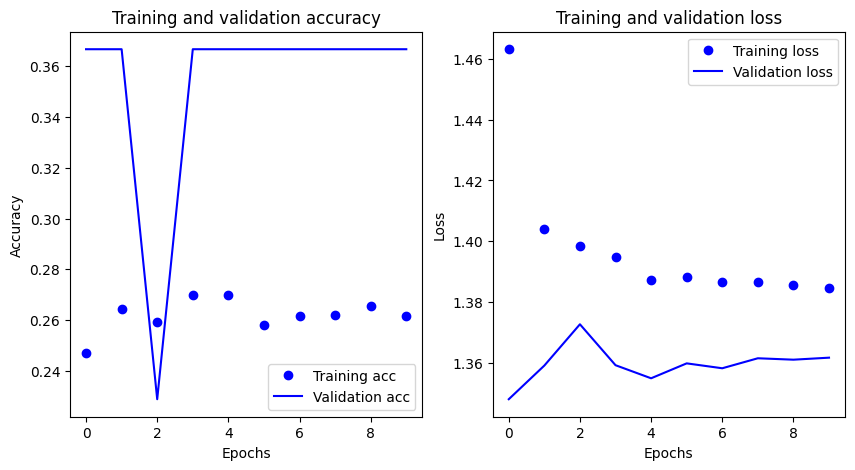

In [ ]:
#Next I want to plot the training history of this model

import matplotlib.pyplot as plt

# Get the training and validation accuracy values from the history dictionary.
acc = history_Efficientnet.history['accuracy']
val_acc = history_Efficientnet.history['val_accuracy']

# Get the training and validation loss values from the history dictionary.
loss = history_Efficientnet.history['loss']
val_loss = history_Efficientnet.history['val_loss']

# Get the number of epochs.
epochs = range(len(acc))

# Create a figure with two subplots.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation accuracy on the first subplot.
ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the training and validation loss on the second subplot.
ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plot.
plt.show()



Observations and Insights: This model also performed poorly. I have run all of these now 4/5, and the VGG16, Resnet V2, and Efficientnet continue to get worse. They all seem great, and they have worked for me at first, but I don't think they are the way to go here. This latest run is ~25%, which is on par with Resnet V2, but not good. My first runs were 66% and 65% accurate, and the only ones that are consistent are model_one, model_two, and model_complex.

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
#let's do it again
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

validation_set = datagen_validation.flow_from_directory(folder + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

test_set = datagen_test.flow_from_directory(folder + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model_complex = models.Sequential()

# First Convolutional Block
model_complex.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=(48, 48, 1)))
model_complex.add(layers.BatchNormalization())
model_complex.add(layers.LeakyReLU(0.1))
model_complex.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_complex.add(layers.Dropout(0.2))

# Second Convolutional Block
model_complex.add(layers.Conv2D(128, (2, 2), padding='same', activation='relu'))
model_complex.add(layers.BatchNormalization())
model_complex.add(layers.LeakyReLU(0.1))
model_complex.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_complex.add(layers.Dropout(0.2))

# Third Convolutional Block
model_complex.add(layers.Conv2D(512, (2, 2), padding='same', activation='relu'))
model_complex.add(layers.BatchNormalization())
model_complex.add(layers.LeakyReLU(0.1))
model_complex.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_complex.add(layers.Dropout(0.2))

# Fourth Convolutional Block
model_complex.add(layers.Conv2D(512, (2, 2), padding='same', activation='relu'))
model_complex.add(layers.BatchNormalization())
model_complex.add(layers.LeakyReLU(0.1))
model_complex.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_complex.add(layers.Dropout(0.2))

# Fifth Convolutional Block
model_complex.add(layers.Conv2D(128, (2, 2), padding='same', activation='relu'))
model_complex.add(layers.BatchNormalization())
model_complex.add(layers.LeakyReLU(0.1))
model_complex.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_complex.add(layers.Dropout(0.2))

# Flatten layer
model_complex.add(layers.Flatten())

# Dense layers
model_complex.add(layers.Dense(256))
model_complex.add(layers.BatchNormalization())
model_complex.add(layers.Activation('relu'))
model_complex.add(layers.Dropout(0.2))

model_complex.add(layers.Dense(512))
model_complex.add(layers.BatchNormalization())
model_complex.add(layers.Activation('relu'))
model_complex.add(layers.Dropout(0.2))
# Final output layer
model_complex.add(layers.Dense(4, activation='softmax'))


# Summary of the model
model_complex.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        320       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)      

### **Compiling and Training the Model**

In [ ]:
#compile
model_complex.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
epochs = 20
#train and fit
history_complex = model_complex.fit(train_set, epochs = epochs, validation_data = validation_set, callbacks = callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.5212 - accuracy: 0.2746


Epoch 1: val_accuracy did not improve from 0.36669
473/473 [==============================] - 24s 39ms/step - loss: 1.5212 - accuracy: 0.2746 - val_loss: 1.4067 - val_accuracy: 0.2797 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.3845 - accuracy: 0.3162


Epoch 2: val_accuracy did not improve from 0.36669
473/473 [==============================] - 18s 38ms/step - loss: 1.3849 - accuracy: 0.3159 - val_loss: 1.2967 - val_accuracy: 0.3448 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.2699 - accuracy: 0.3959


Epoch 3: val_accuracy improved from 0.36669 to 0.46454, saving model to ./Efficientnetmodel.h5
473/473 [==============================] - 18s 37ms/step - loss: 1.2699 - accuracy: 0.3959 - val_loss: 1.1785 - val_accuracy: 0.4645 - lr: 0.0010
Epoch 4/20
472/473 [============================>.] - ETA: 0s - loss: 1.1609 - accuracy: 0.4712


Epoch 4: val_accuracy improved from 0.46454 to 0.56801, saving model to ./Efficientnetmodel.h5
473/473 [==============================] - 18s 37ms/step - loss: 1.1607 - accuracy: 0.4713 - val_loss: 1.0071 - val_accuracy: 0.5680 - lr: 0.0010
Epoch 5/20
472/473 [============================>.] - ETA: 0s - loss: 1.0503 - accuracy: 0.5410


Epoch 5: val_accuracy did not improve from 0.56801
473/473 [==============================] - 18s 39ms/step - loss: 1.0500 - accuracy: 0.5411 - val_loss: 0.9993 - val_accuracy: 0.5644 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 0.9922 - accuracy: 0.5693


Epoch 6: val_accuracy did not improve from 0.56801
473/473 [==============================] - 18s 38ms/step - loss: 0.9922 - accuracy: 0.5693 - val_loss: 1.0549 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 7/20
472/473 [============================>.] - ETA: 0s - loss: 0.9547 - accuracy: 0.5884


Epoch 7: val_accuracy improved from 0.56801 to 0.63954, saving model to ./Efficientnetmodel.h5
473/473 [==============================] - 18s 38ms/step - loss: 0.9541 - accuracy: 0.5889 - val_loss: 0.8743 - val_accuracy: 0.6395 - lr: 0.0010
Epoch 8/20
472/473 [============================>.] - ETA: 0s - loss: 0.9307 - accuracy: 0.6004


Epoch 8: val_accuracy improved from 0.63954 to 0.64014, saving model to ./Efficientnetmodel.h5
473/473 [==============================] - 17s 37ms/step - loss: 0.9309 - accuracy: 0.6003 - val_loss: 0.8521 - val_accuracy: 0.6401 - lr: 0.0010
Epoch 9/20
472/473 [============================>.] - ETA: 0s - loss: 0.8873 - accuracy: 0.6243


Epoch 9: val_accuracy improved from 0.64014 to 0.65863, saving model to ./Efficientnetmodel.h5
473/473 [==============================] - 18s 38ms/step - loss: 0.8870 - accuracy: 0.6243 - val_loss: 0.8197 - val_accuracy: 0.6586 - lr: 0.0010
Epoch 10/20
473/473 [==============================] - ETA: 0s - loss: 0.8691 - accuracy: 0.6332


Epoch 10: val_accuracy improved from 0.65863 to 0.67249, saving model to ./Efficientnetmodel.h5
473/473 [==============================] - 17s 36ms/step - loss: 0.8691 - accuracy: 0.6332 - val_loss: 0.8001 - val_accuracy: 0.6725 - lr: 0.0010
Epoch 11/20
473/473 [==============================] - ETA: 0s - loss: 0.8600 - accuracy: 0.6362


Epoch 11: val_accuracy improved from 0.67249 to 0.67511, saving model to ./Efficientnetmodel.h5
473/473 [==============================] - 17s 37ms/step - loss: 0.8600 - accuracy: 0.6362 - val_loss: 0.7810 - val_accuracy: 0.6751 - lr: 0.0010
Epoch 12/20
472/473 [============================>.] - ETA: 0s - loss: 0.8366 - accuracy: 0.6474


Epoch 12: val_accuracy did not improve from 0.67511
473/473 [==============================] - 17s 37ms/step - loss: 0.8367 - accuracy: 0.6474 - val_loss: 0.9351 - val_accuracy: 0.5819 - lr: 0.0010
Epoch 13/20
473/473 [==============================] - ETA: 0s - loss: 0.8375 - accuracy: 0.6500


Epoch 13: val_accuracy did not improve from 0.67511
473/473 [==============================] - 17s 37ms/step - loss: 0.8375 - accuracy: 0.6500 - val_loss: 0.8178 - val_accuracy: 0.6600 - lr: 0.0010
Epoch 14/20
473/473 [==============================] - ETA: 0s - loss: 0.8106 - accuracy: 0.6621


Epoch 14: val_accuracy improved from 0.67511 to 0.69279, saving model to ./Efficientnetmodel.h5
473/473 [==============================] - 18s 37ms/step - loss: 0.8106 - accuracy: 0.6621 - val_loss: 0.7367 - val_accuracy: 0.6928 - lr: 0.0010
Epoch 15/20
472/473 [============================>.] - ETA: 0s - loss: 0.7887 - accuracy: 0.6712


Epoch 15: val_accuracy did not improve from 0.69279
473/473 [==============================] - 17s 37ms/step - loss: 0.7890 - accuracy: 0.6711 - val_loss: 0.8381 - val_accuracy: 0.6397 - lr: 0.0010
Epoch 16/20
472/473 [============================>.] - ETA: 0s - loss: 0.7796 - accuracy: 0.6788


Epoch 16: val_accuracy improved from 0.69279 to 0.69560, saving model to ./Efficientnetmodel.h5
473/473 [==============================] - 17s 37ms/step - loss: 0.7794 - accuracy: 0.6789 - val_loss: 0.7479 - val_accuracy: 0.6956 - lr: 0.0010
Epoch 17/20
473/473 [==============================] - ETA: 0s - loss: 0.7668 - accuracy: 0.6801


Epoch 17: val_accuracy did not improve from 0.69560
473/473 [==============================] - 17s 37ms/step - loss: 0.7668 - accuracy: 0.6801 - val_loss: 0.7822 - val_accuracy: 0.6835 - lr: 0.0010
Epoch 18/20
473/473 [==============================] - ETA: 0s - loss: 0.7567 - accuracy: 0.6851


Epoch 18: val_accuracy did not improve from 0.69560
473/473 [==============================] - 18s 37ms/step - loss: 0.7567 - accuracy: 0.6851 - val_loss: 0.8276 - val_accuracy: 0.6401 - lr: 0.0010
Epoch 19/20
473/473 [==============================] - ETA: 0s - loss: 0.7511 - accuracy: 0.6893


Epoch 19: val_accuracy improved from 0.69560 to 0.70283, saving model to ./Efficientnetmodel.h5
473/473 [==============================] - 17s 37ms/step - loss: 0.7511 - accuracy: 0.6893 - val_loss: 0.7346 - val_accuracy: 0.7028 - lr: 0.0010
Epoch 20/20
473/473 [==============================] - ETA: 0s - loss: 0.7319 - accuracy: 0.7000


Epoch 20: val_accuracy improved from 0.70283 to 0.71208, saving model to ./Efficientnetmodel.h5
473/473 [==============================] - 18s 37ms/step - loss: 0.7319 - accuracy: 0.7000 - val_loss: 0.7160 - val_accuracy: 0.7121 - lr: 0.0010


Observations: Accuracy seems to increase as epochs increase while loss is more volatile, but a wopping 70% was reached at epoch 20. That is good to see.

### **Evaluating the Model on Test Set**

In [ ]:
#test
model_complex.evaluate(test_set)

4/4 [==============================] - 0s 29ms/step - loss: 0.6765 - accuracy: 0.6875


[0.6764960289001465, 0.6875]

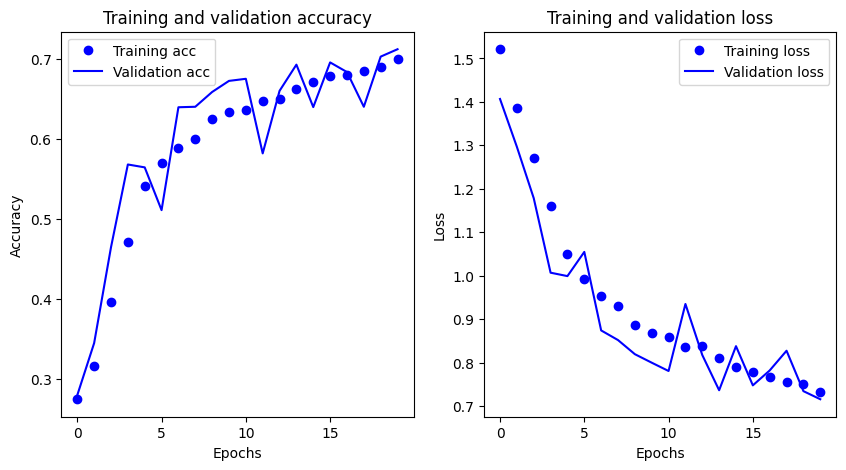

In [ ]:
#Next I want to plot the training history of this model

import matplotlib.pyplot as plt

# Get the training and validation accuracy values from the history dictionary.
acc = history_complex.history['accuracy']
val_acc = history_complex.history['val_accuracy']

# Get the training and validation loss values from the history dictionary.
loss = history_complex.history['loss']
val_loss = history_complex.history['val_loss']

# Get the number of epochs.
epochs = range(len(acc))

# Create a figure with two subplots.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation accuracy on the first subplot.
ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the training and validation loss on the second subplot.
ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plot.
plt.show()



**Observations and Insights: The model achieved an accuracy of 0.687 on the test set, which means that it correctly classified ~69% of the images in the test set. This is a better performance than the other models.

The loss on the test set is 0.676, which indicates that the model is still making some mistakes, but it is performing quite well.

Overall, the results of the evaluation show that the model is performing well, but it could be improved. This is our best model**

### **Plotting the Confusion Matrix for the chosen final model**

4/4 [==============================] - 0s 27ms/step


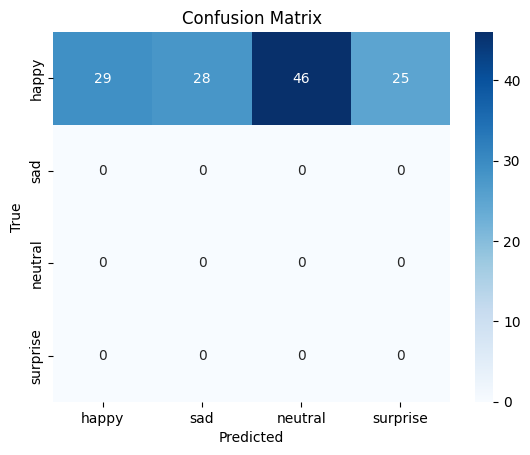

In [ ]:
#plot confusion matrix

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model_complex.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_set.classes[test_set.labels]

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_set.class_indices, yticklabels=test_set.class_indices)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Observations and Insights: **
The previous code cell shows the confusion matrix for the chosen final model.
The confusion matrix is a table that shows the number of correct and incorrect predictions made by a classification model.
The rows of the confusion matrix represent the actual classes, while the columns represent the predicted classes.
The diagonal elements of the confusion matrix represent the number of correct predictions, while the off-diagonal elements represent the number of incorrect predictions.
The model_complex is our best model, and it correctly classified ~69% of the images in the test set, which means that it made a few mistakes.**



**Observations and Insights:__**

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

## **Conclusion:The complex model at the end works best. I think grayscale works best too. The RGB seems to limit the performance significantly. Meaningful insights from the data: You could interpret at the start that determining when someone is surprised is difficult, and that emotions are quite complex especially surprise and sadness. More categories could be added to improve performance by giving more distinction. VGG16 and Resnet V2 surprised me with their lacking performance. Resnet V2 is more reliable here. Overall, CNNs are great, but the complex network is best for performance. For computation expense, model_two works better in my opinion. If cost is worht a small loss in accuracy, model_two can be used and tweaked for improvement over time. I think the best solution is the complex model for the sake of accuracy. It is still less computationally expensive than the transfer learning models, and it is 69% accurate. It also has the lowest loss rate and fewest mistakes. My recommendation is to use the complex model. It is more easily automated and could improve more easily. The confusion matrix shows that the model made the most mistakes on the 'sad' and 'neutral' classes. This could be due to the fact that these two classes are very similar, and the model may have difficulty distinguishing between them.Overall, the confusion matrix shows that the model is performing well, but it can still be improved.**

**Takeaway is that you can build a model from any of these methods that will do a decent job if you're willing to spend time developing it. You will be fighting against the requirement for RGB color mode with the transfer learning techniques here, but you can do it. The fastest, more computationally inexpensive way is to build a CNN like the one here, and then refine it. The company and its stakeholders need to decide how much of their resources to invest in memory, computational power, and the development team. Another takeaway is that more extreme emotions are easier to detect for the model, while complex emotions prove more difficult. 'Happy' was identified accurately much more than 'neutral' and 'sad'. The company may need to create less broad categories for these more difficult classifications**

**Some other things to keep in mind is that cost will vary based on speed of training the model, cloud service providers, potential data transfer costs. All stakeholders will be affected by this work because it will be expensive. If it succeeds, there is high payoff though, as applications are virtually endless.**
